In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation
import time
import random as rd 
from keras.layers import Input, Conv2D, Conv3D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout, Flatten

In [ ]:
path='/content/data'
level_names=(os.listdir(path))
level_names.sort()#si les niveaux ne sont pas dans le bon ordre cela faussera la claissification faite à la main

In [ ]:
#j'extrait les differentes cases du niveau : ce sont des cases de 16*16 dont je ne prends pas les bords
cases=[]
for name in level_names:
  image = img.imread(path+'/'+name)
  n,m,l=image.shape
  for i in range(0,n-16,16):
    for j in range(0,m-16,16):
      case=image[i+1:i+15,j+1:j+15]

      if case.tolist() not in cases:
        cases.append(case.tolist())

#resultat de la classification faite à la main
#à chaque case on associe une classe entre 0 et 36
case2classe=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 9, 10, 11, 8, 1, 0, 17, 17, 14, 12, 0, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 19, 19, 0, 19, 20, 19, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 11, 17, 17, 19, 0, 16, 16, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 16, 16, 14, 11, 0, 19, 22, 22, 17, 17, 17, 0, 0, 0, 11, 9, 8, 17, 17, 17, 17, 17, 0, 0, 0, 21, 0, 20, 21, 8, 3, 0, 0, 21, 8, 8, 8, 24, 0, 16, 8, 8, 0, 15, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 11, 15, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 25, 0, 26, 26, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 26, 26, 0, 0, 0, 0, 8, 0, 0, 18, 0, 0, 0, 18, 4, 0, 0, 0, 8, 11, 2, 0, 0, 22, 22, 20, 0, 22, 2, 0, 0, 23, 0, 0, 5, 0, 0, 0, 19, 19, 19, 19, 20, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 36, 8, 27, 28, 36, 28, 36, 27, 28, 36, 25, 3, 36, 36, 28, 36, 28, 36, 36, 28, 36, 36, 28, 17, 36, 28, 28, 17, 28, 36, 28, 36, 28, 36, 28, 36, 28, 36, 23, 36, 36, 0, 0, 28, 0, 0, 28, 0, 0, 0, 28, 0, 28, 0, 28, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 28, 0, 0, 0, 0, 0, 28, 0, 28, 8, 0, 28, 0, 28, 0, 0, 0, 0, 28, 28, 0, 0, 28, 0, 0, 0, 0, 0, 16, 0, 10, 29, 16, 0, 0, 16, 16, 25, 25, 0, 25, 3, 0, 26, 26, 26, 26, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 1, 0, 0, 0, 19, 22, 22, 0, 19, 0, 19, 30, 17, 17, 8, 0, 0, 17, 17, 0, 0, 23, 5, 0, 23, 0, 0, 0, 19, 20, 0, 5, 0, 19, 23, 0, 3, 23, 0, 0, 0, 0, 20, 20, 19, 6, 6, 6, 0, 8, 8, 6, 0, 0, 0, 0, 24, 16, 16, 16, 3, 16, 0, 0, 0, 25, 25, 29, 26, 26, 9, 25, 25, 26, 26, 0, 15, 29, 0, 31, 0, 0, 32, 0, 32, 0, 32, 32, 0, 32, 0, 0, 0, 31, 31, 0, 0, 33, 0, 33, 33, 0, 33, 4, 0, 16, 0, 0, 0, 0, 16, 16, 8, 22, 22, 2, 0, 34, 6, 6, 6, 0, 6, 8, 8, 8, 0, 16, 0, 6, 16, 0, 0, 21, 16, 16, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 26, 26, 0, 0, 0, 0, 0, 25, 25, 26, 26, 17, 17, 8, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 18, 0, 0, 0, 0, 17, 17, 23, 0, 0, 0, 0, 0, 23, 7, 0, 35, 0, 7, 8, 0, 0, 20, 0, 35, 20, 0, 0, 0, 0, 30, 23, 0, 7, 0, 23, 0, 23, 23, 0, 0, 23, 20, 34, 34, 34, 0, 19, 7, 7, 0, 7, 16, 0, 16, 7, 0, 7, 0, 0, 7, 0, 15, 29, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 32, 32, 32, 32, 32, 0, 31, 2, 31, 0, 0, 31, 0, 33, 0, 0, 0, 17, 17, 33, 0, 0, 0, 0, 33, 33, 0, 0, 0, 0, 23, 34, 23, 0, 19, 0, 0, 0, 6, 6, 6, 0, 0, 0, 0, 0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 16, 0, 0, 7, 0, 0, 16, 16, 7, 0, 7, 5, 16, 8, 8, 0, 29, 0, 0, 0, 26, 0, 0, 0, 30, 0, 7, 0, 0, 30, 0, 23, 0, 30, 0, 23, 0, 23, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 26, 26, 0, 25, 25, 26, 26, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 31, 0, 32, 23, 0, 23, 0, 33, 13, 23, 23, 0, 0, 23, 0, 23, 0, 23, 0, 7, 0, 0, 0, 0, 30, 20, 30, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 23, 0, 28, 0, 25, 25, 0, 26, 0, 0, 0, 0, 0, 0, 23, 23, 29, 8, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 19, 0, 19, 34, 30, 0, 0, 0, 0, 28, 0]
#à chaque classe on associe une case qui la representera
classe2case=[0, 16, 193, 114, 187, 207, 485, 593, 50, 12, 13, 14, 21, 757, 20, 606, 596, 18, 182, 10, 45, 117, 196, 711, 121, 513, 693, 229, 317, 329, 702, 457, 447, 460, 589, 560, 227,49]
dim=len(classe2case)

#je m'étais trompé dans le range de i et j, mais le corriger en amont aurait faussé la classification faite à la main
cases_correction=[]
for nom in level_names:
  image = img.imread(path+'/'+nom)
  n,m,l=image.shape
  for i in range(0,n-15,16):
    for j in range(0,m-15,16):
      case=image[i+1:i+15,j+1:j+15]

      if case.tolist() not in cases and case.tolist() not in cases_correction:
        cases_correction.append(case.tolist())

cases.append(cases_correction[0])
cases.append(cases_correction[1])





In [ ]:
def image2matrix(image):
  #converti une image de pixel (n,m,3) en matrice de classe ((n/16),(m/16))
  n,m,l=image.shape
  matrix=[]
  for i in range(2*16,n-15,16):
    ligne=[]
    for j in range(0,m-15,16):
      case=image[i+1:i+15,j+1:j+15].tolist()
      index=cases.index(case)
      classe=int(case2classe[index])
      ligne.append(classe)
    matrix.append(ligne)
  return(np.array(matrix))

def matrix2sequence(matrix,snake=False):
  #converti une matrice de classe (n,m) en sequence de vecteur ((n*m),(dim))
  sequence=[]
  n,m=matrix.shape
  i=0
  j=0
  sens=1
  while j<m:
    classe=matrix[i,j]
    x=[0 for k in range(dim)]
    x[classe]=1
    sequence.append(x)
    i+=sens
    if i>=n:
      x=[0 for k in range(dim)]
      x[-1]=1
      sequence.append(x)
      j+=1
      if snake:
        i-=1
        sens=-1
      else:
        i=0
    if i<0:
      j+=1
      i+=1
      sens=1
  return(np.array(sequence))

def sequence2matrix(sequence,snake=False):
  #converti une sequence de vecteur ((n*m),(dim)) en matrice de classe (n,m)

  matrix=[]
  colonne=[]
  sens=1
  for x in sequence:
    classe=np.argmax(x)
    if classe!=dim-1:
      colonne.append(classe)
      if len(colonne)==13:
        if sens==1:
          matrix.append(colonne[:])
          colonne= []
          if snake:
            sens=-1
        else:
          matrix.append(colonne[::-1])
          colonne=[]
          sens=1
  return(np.array(matrix))

def matrix2image(matrix):
  #converti une matrice de classe ((n/16),(m/16)) en image de pixel (n,m,3)
  print(matrix.shape)
  n,m=matrix.shape
  image=np.zeros((16*m,16*n,3))
  for i in range(m):
    for j in range(n):
      classe=matrix[j,i]
      case=cases[classe2case[classe]]
      image[16*i+1:16*i+15,16*j+1:16*j+15,:]=case
  return(image)

def decoupe(sequence,pas,longueur):
  res=[]
  curseur=0
  taille=sequence.shape[0]
  while curseur+longueur<=taille:
      individu=sequence[curseur:curseur+longueur,:]
      res.append(list(individu))
      curseur+=pas
  return(res)


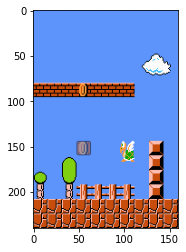

In [ ]:
#test
image=img.imread(path+'/'+rd.choice(level_names))
n_colonne=10
r=rd.randint(0,image.shape[1]//16-n_colonne-1)
image=image[:,16*r:16*(r+n_colonne),:]
plt.imshow(image)

(10, 13)


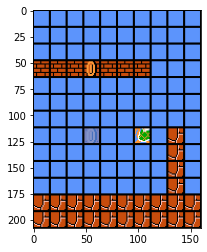

In [ ]:
snake=True
sequence=matrix2sequence(image2matrix(image),snake)
image2=matrix2image(sequence2matrix(sequence,snake))
plt.imshow(image2)

In [ ]:

step=5
lenght=14*3

In [ ]:
snake=False
data=[]
alldata=[]
for k in range(len(level_names)):
    name=level_names[k]
    if k!=30:
      image = img.imread(path+'/'+name)
      matrix=image2matrix(image)
      sequence1=matrix2sequence(matrix,snake)
      alldata.append(sequence1)
      data+=decoupe(sequence1,step,lenght+1)



INPUTS=[]
TARGETS=[]
for x in data:
    INPUTS.append(x[:-1])
    TARGETS.append(x[-1])

INPUTS=np.array(INPUTS)
TARGETS=np.array(TARGETS)

n_classe=TARGETS.shape[1]



print("base de donnée terminée")
print(INPUTS.shape)

base de donnée terminée
(18126, 42, 38)


In [ ]:


model=Sequential()
model.add(LSTM(256, input_shape=(lenght, n_classe), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(n_classe))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
#model.summary()






In [ ]:
NB_ITER=100
t=time.time()
model.fit(INPUTS, TARGETS, epochs=NB_ITER)
print("apprentissage terminé")


Epoch 1/100
567/567 [==============================] - 20s 29ms/step - loss: 0.8040
Epoch 2/100
567/567 [==============================] - 16s 28ms/step - loss: 0.4674
Epoch 3/100
567/567 [==============================] - 16s 28ms/step - loss: 0.3841
Epoch 4/100
567/567 [==============================] - 16s 28ms/step - loss: 0.3310
Epoch 5/100
567/567 [==============================] - 16s 28ms/step - loss: 0.2981
Epoch 6/100
567/567 [==============================] - 16s 28ms/step - loss: 0.2641
Epoch 7/100
567/567 [==============================] - 16s 28ms/step - loss: 0.2472
Epoch 8/100
567/567 [==============================] - 16s 28ms/step - loss: 0.2294
Epoch 9/100
567/567 [==============================] - 16s 28ms/step - loss: 0.2229
Epoch 10/100
567/567 [==============================] - 16s 28ms/step - loss: 0.2101
Epoch 11/100
567/567 [==============================] - 16s 28ms/step - loss: 0.1963
Epoch 12/100
567/567 [==============================] - 16s 28ms/step - lo

In [ ]:
def sample(preds, temperature=1.0, do_sample=True):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    preds = np.reshape(preds, (1, preds.shape[0]))
    if do_sample:
        return np.argmax(probas)
    else:
        return np.argmax(preds)


def random_level_start(n_colonne):
  image=img.imread(path+'/'+rd.choice(level_names))
  n_colonne=10
  r=rd.randint(0,image.shape[1]//16-n_colonne-1)
  small_image=image[:,16*r:16*(r+n_colonne),:]
  level_start=matrix2sequence(image2matrix(small_image),snake)
  return(level_start)

def generate_new_level(taille):
  n_colonne=lenght//13+1*(lenght%13!=0)
  level_start=random_level_start(n_colonne)
  new_level=level_start
  for i in range(taille):
      preds=model.predict(np.array([new_level[-lenght:]]))[0]
      nexti=sample(preds)
      next=[0 for k in range(dim)]
      next[nexti]=1
      next=np.array([next])

      new_level = np.append(new_level,next,axis= 0)
  return(new_level)



In [ ]:
ex=0

(110, 13)


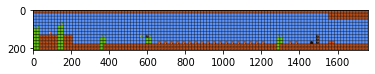

In [ ]:
ex+=1
nom=""
if snake:
  nom+="snake"
nom+="long"+str(lenght)+"pas"+str(step)+"ex"+str(ex)
sequence=generate_new_level(500)
#sequence=generate_new_level(100*14)
image2=matrix2image(sequence2matrix(sequence,snake))
plt.imshow(image2)
img.imsave(nom+".png", image2)